## C S 329E HW 10

# Hierarchical Clustering and Cluster Evaluation

## Elena Zhang, Emily Zhou

This week, let us consider presidential elections of years past and do some exploratory grouping of states based on the 2008,2012, and 2016 presidential elections results.  The data we have is from the [The American Presidency Project](https://www.presidency.ucsb.edu/statistics/elections) and split into two files:

  - `votes_by_state.csv` => has the raw number of ballots cast for each of the top presidential candidates from 2008-2012 by US State (and the District of Columbia)
  - `republican_percentage_by_state.csv` => has the percentage of votes that were for the Republican candidate for 2008, 2012, and 2016 by US State (and the District of Columbia)
  
Our job is to group together states using different hierarchical agglomerative methodologies and compare the results.  You can imagine how finding states that tend to vote similarly to each other might be useful for election predictions, or for identifying swing states as part of a political campaign to invest in.

In [1]:
# Do not modify import block, all necessary imports are included

# Our regular libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

# For our k-means clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples


## Q1 - Using Different Proximity Functions

There is another scientific python library we haven't used much, SciPy, which has [library for hierarchical clustering](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage) and for [plotting dendrograms](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram). 

Use these libraries to plot the hierarchical clusters formed from the raw vote count (`votes_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup. 

In [2]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('votes_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

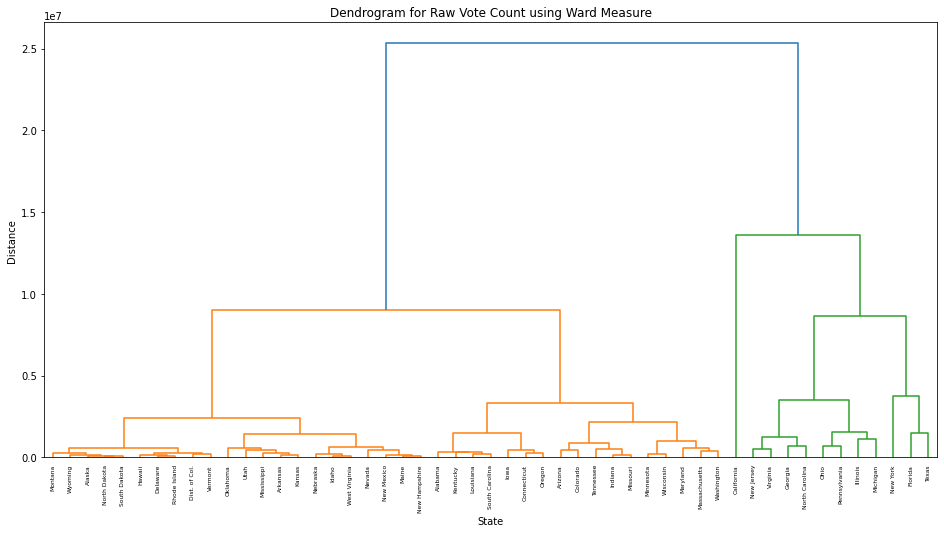

In [3]:
# Plot the dendrogram for the Ward proximity measure
Z = linkage(df_X, 'ward')
fig = plt.figure(figsize = (16,8))
dn = dendrogram(Z, labels = s_states.tolist())

# labels
plt.xlabel("State")
plt.ylabel("Distance")
plt.title("Dendrogram for Raw Vote Count using Ward Measure")
plt.show()

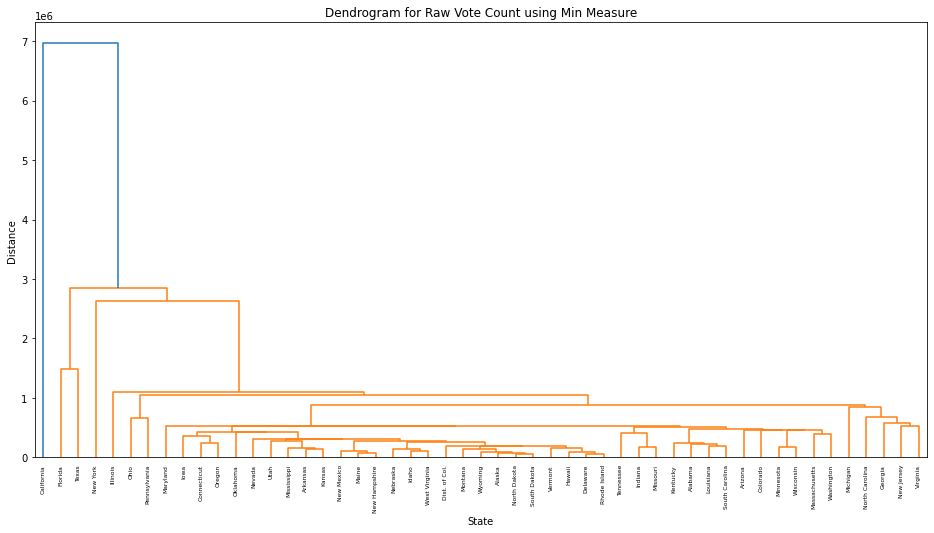

In [4]:
# Plot the dendrogram for the min proximity measure
Z = linkage(df_X, 'single')
fig = plt.figure(figsize = (16,8))
dn = dendrogram(Z, labels = s_states.tolist())

# labels
plt.xlabel("State")
plt.ylabel("Distance")
plt.title("Dendrogram for Raw Vote Count using Min Measure")
plt.show()

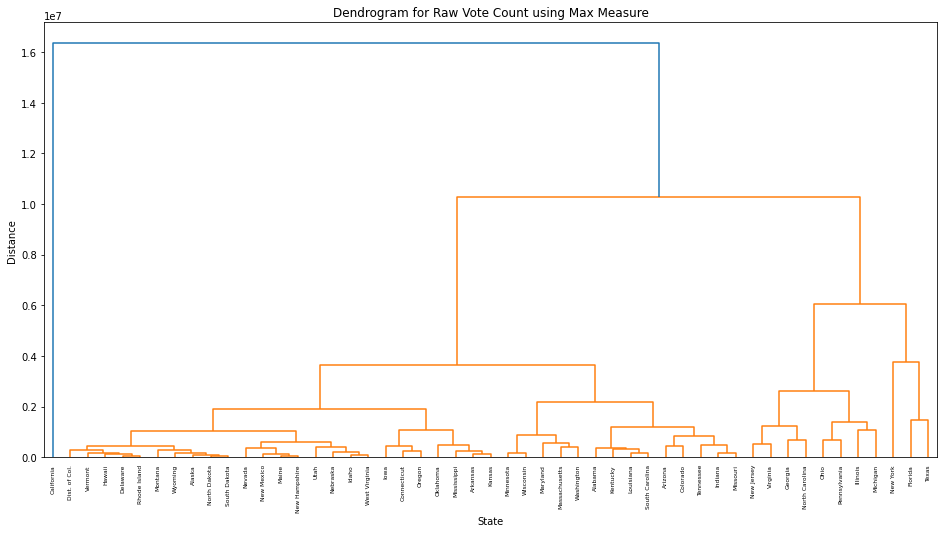

In [5]:
# Plot the dendrogram for the max proximity measure
Z = linkage(df_X, 'complete')
fig = plt.figure(figsize = (16,8))
dn = dendrogram(Z, labels = s_states.tolist())

# labels
plt.xlabel("State")
plt.ylabel("Distance")
plt.title("Dendrogram for Raw Vote Count using Max Measure")
plt.show()

## Q2 - Using Different Proximity Functions (part 2)

What is happening?  Even if you aren't a big politics wonk, you might find it strange that New York is closer to Texas than it is to California in all of those graphs!! You may think to yourself, "Self, how could this be?" You also might notice that Montana, Wyoming, and Alaska all tend to cluster together in all of these scenarios. 

At this point, your data science brain might be noticing that the _population_ of that state seems to be more important than which party _won_ the state.  You decide to engineer the data such that you reduce the dimensions down from 7 attributes, to 3 attributes, where each column is the _percentage_ of votes that were cast to the Republican candidate, and a 4th attribute indicating the range of percentages across the 3 elections.  I went ahead and did this for you, and created the file `republican_percentage_by_state.csv`. 

Plot the hierarchical clusters formed from percentage of ballots cast by Republicans (`republican_percentage_by_state.csv`) using three different proximity measures:
  - Ward
  - Min
  - Max
  
The x-axis of the dendrogram should be labeled using the state name (and not the index of the state in the data frame).  The title should reflect what proximity measure you used to create the clusters.  In this use case only the number of votes cast are attributes, and the State names are the labels on that row of data.

Note, to make the plot legible you will have to change the plot size.  I found `figsize=(12,8)` worked well for me, but your mileage may vary depending on your setup. 

In [6]:
# Load the data, save off the state names into another series and just leave the attributes.
df_X = pd.read_csv('republican_percentage_by_state.csv')
s_states = df_X['State']
df_X = df_X.drop(columns=['State'])

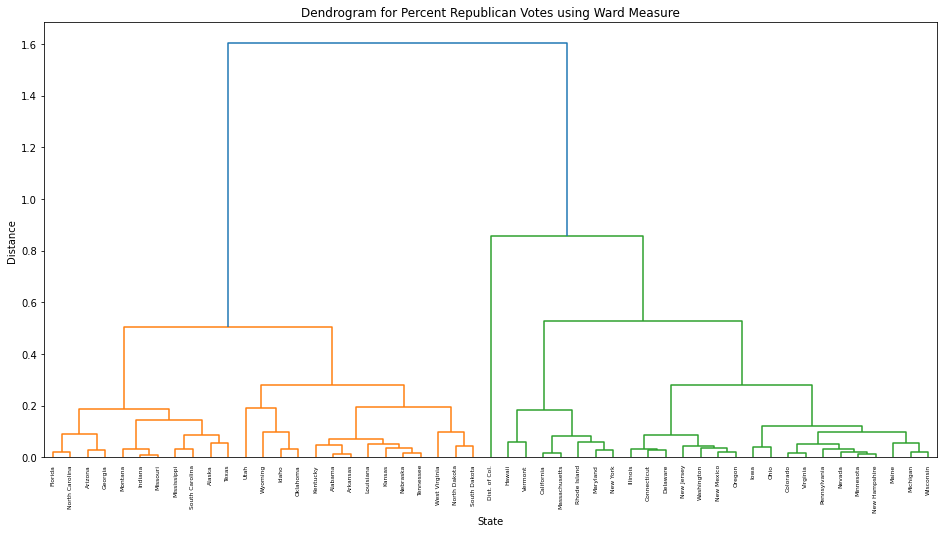

In [7]:
# Plot the dendrogram for the Ward proximity measure
Z_ward = linkage(df_X, 'ward')
fig = plt.figure(figsize = (16,8))
dn = dendrogram(Z_ward, labels = s_states.tolist())

# labels
plt.xlabel("State")
plt.ylabel("Distance")
plt.title("Dendrogram for Percent Republican Votes using Ward Measure")
plt.show()

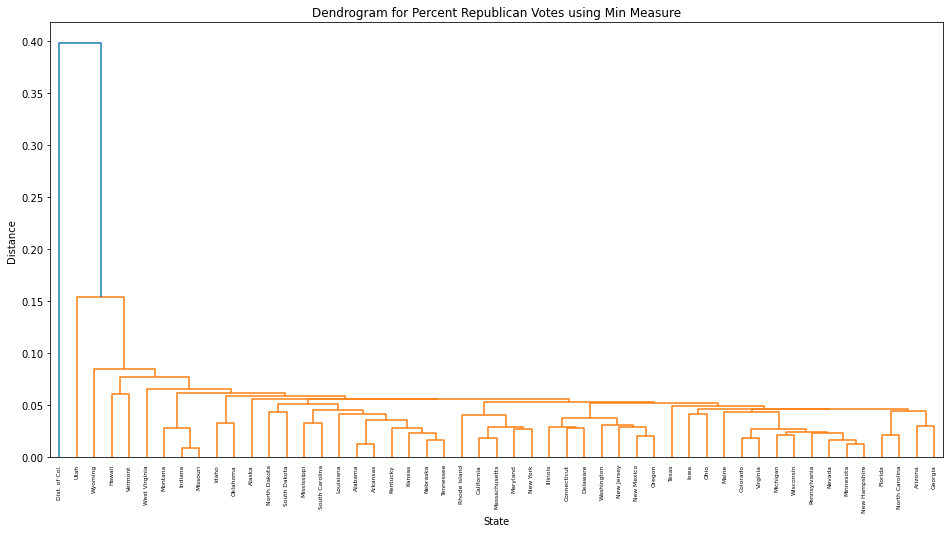

In [8]:
# Plot the dendrogram for the min proximity measure
Z_min = linkage(df_X, 'single')
fig = plt.figure(figsize = (16,8))
dn = dendrogram(Z_min, labels = s_states.tolist())

# labels
plt.xlabel("State")
plt.ylabel("Distance")
plt.title("Dendrogram for Percent Republican Votes using Min Measure")
plt.show()

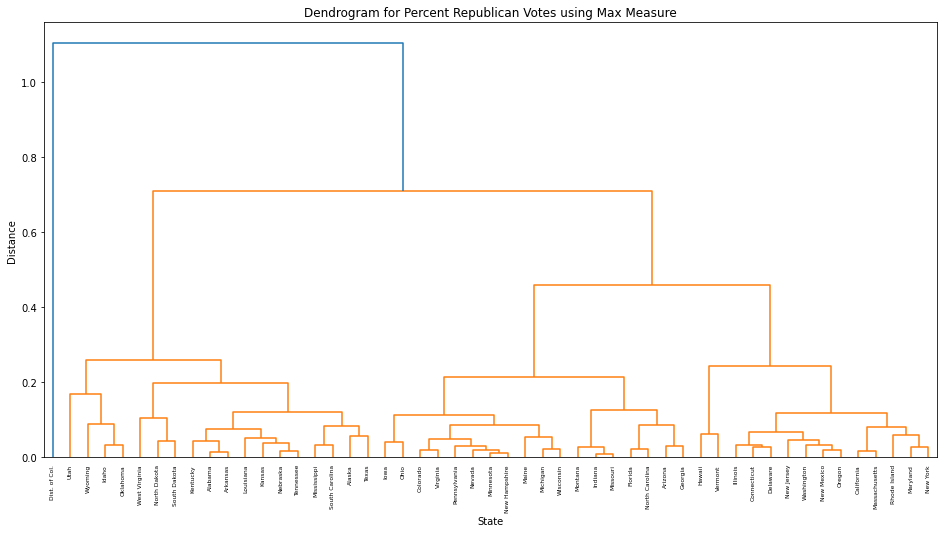

In [9]:
# Plot the dendrogram for the max proximity measure
Z_max = linkage(df_X, 'complete')
fig = plt.figure(figsize = (16,8))
dn = dendrogram(Z_max, labels = s_states.tolist())

# labels
plt.xlabel("State")
plt.ylabel("Distance")
plt.title("Dendrogram for Percent Republican Votes using Max Measure")
plt.show()

## Q3 Calculate the Cophenetic Correlation Coefficient (CPCC)

Using the data from question 2 (creating hierarchical clusters on the percentage of Republican votes), calculate the Cophenetic Correlation Coefficient for each of the three methods.  Display the results, and add a markdown cell explaining how to interpret this metric. You may use the scipy [cophenet function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html) with the output from  [pdist](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html) function as the `Y` parameter. 

In [10]:
# Cophenetic distance using Ward proximity measure
cophenetic_ward = cophenet(Z = Z_ward, Y = pdist(df_X, metric = "euclidean"))
cpcc_ward = cophenetic_ward[0]

# Cophenetic distance using Min proximity measure
cophenetic_min = cophenet(Z = Z_min, Y = pdist(df_X, metric = "euclidean"))
cpcc_min = cophenetic_min[0]

# Cophenetic distance using Max proximity measure
cophenetic_max = cophenet(Z = Z_max, Y = pdist(df_X, metric = "euclidean"))
cpcc_max = cophenetic_max[0]

In [11]:
# Show the results
(cpcc_ward,cpcc_min,cpcc_max)

(0.5883071696030502, 0.695463585768092, 0.7406937703705782)

➡️ The cophenetic correlation coefficient measures the correlation between the cophenetic distance matrix and the original proximity matrix. In other words, we can use the CPCC to measure how well each type of clustering performs with the data. The higher the CPCC, the better the hierarchical clustering technique fits the data. In this case, the CPCC for max/complete linkage is the highest, followed by min/single linkage, then Ward. This means that the clustering technique using max linkage fits the data the best. ⬅️

## Q4 Find new Clusters Based on K-Means

A political wonk has come to visit you in your data science dungeon, and looks over your shoulder.  They like what they see, and especially like the patterns from the Ward proximity diagram, and their team is going to come up with 4 different strategies based on the clustering that you have done.  But, your hierarchical clustering didn't come up with a natural 4 clusters! No problem, you decide to use k-means to come up with the 4 clusters.  You choose these points to initialize your cluster centers based on the Ward proximity graph in your hierarchical clusters:

  - Montana
  - Arkansas
  - Massachusetts
  - Minnesota

Pass `random_state = 23` into the [KMeans function](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Print out your centroids before you pass them to K-Means. Print out the States that are in each k-means cluster.

In [12]:
# Find the centroids
init_centroids = ['Montana', 'Arkansas', 'Massachusetts', 'Minnesota'] # list of centroids

ind = []
# loop through list of centroids and find index for each centroid, append to empty list
for x in init_centroids:
    ind.append(s_states[s_states == x].index[0])

# find row corresponding to each index
centroids = df_X.iloc[ind]


In [13]:
# Show the centroids
centroids

,2016,2012,2008,range
26,0.575769,0.570342,0.511694,0.064075
3,0.625343,0.621544,0.601717,0.023625
21,0.338355,0.382143,0.368029,0.043788
23,0.471869,0.460588,0.447706,0.024163


In [14]:
# Compute the k-means clusters and show the listing of the States in each cluster
kmeans = KMeans(n_clusters = 4, init = centroids, random_state = 23).fit(df_X)

# show states in each cluster
clusters = pd.DataFrame()
clusters["State"] = s_states
clusters["Cluster Label"] = kmeans.labels_
clusters.sort_values(by = "Cluster Label")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


,State,Cluster Label
25,Missouri,0
16,Kansas,0
26,Montana,0
14,Indiana,0
33,North Carolina,0
10,Georgia,0
24,Mississippi,0
40,South Carolina,0
18,Louisiana,0
43,Texas,0


## Q5 Visualize the Silhouette Coefficients for Each Cluster

Using the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_samples.html) implementation in sci-kit learn, calculate the silhouette coefficient for each of the States in our data frame using the clustering from Q4, and create a bar graph, similar to the [left plot in this link](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

Use the Silhouette Coefficient plot to identify clusters that have outliers.  Find the data points that are outliers and then describe in a markdown cells how the visualization helped you identify the outlier points.  

[]

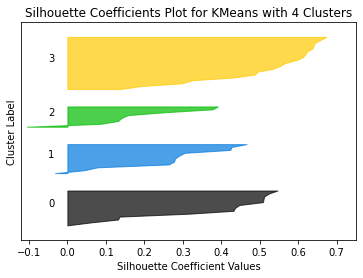

In [15]:
sil = silhouette_samples(df_X, labels = kmeans.labels_) # compute silhouette coefficients

clusters = np.unique(kmeans.labels_) # get list of cluster labels

fig, ax = plt.subplots()
# set axis labels
ax.set_xlim([-0.12, 0.75])
ax.set_ylim([0, len(df_X) + len(clusters + 1) * 6])

y_lower = 5 # set plot starting position

for i in clusters:
    ith_cluster_sil = sil[kmeans.labels_ == i] # find silhouette coefficient for ith cluster
    
    ith_cluster_sil.sort() 
    
    color = cm.nipy_spectral(float(i) / len(clusters)) # select color of ith cluster
    
    size_cluster_i = ith_cluster_sil.shape[0] # get number of observations in ith cluster
    
    y_upper = y_lower + size_cluster_i # set upper position of bar
    
    # fill in bar
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil, facecolor = color, edgecolor = color, alpha = 0.7)
    
    # Label the silhouette plots with their cluster numbers at the middle
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 5  # 10 for the 0 samples
    
# add plot labels
ax.set_title("Silhouette Coefficients Plot for KMeans with 4 Clusters")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_yticks([]) # clear y axis ticks

In [16]:
# Find which states are outliers
sil_coeff = pd.DataFrame()
sil_coeff["State"] = s_states
sil_coeff["Silhouette Coefficient"] = sil
sil_coeff["Cluster"] = kmeans.labels_
sil_coeff[sil_coeff["Silhouette Coefficient"] < 0]

,State,Silhouette Coefficient,Cluster
27,Nebraska,-0.032082,1
39,Rhode Island,-0.105016,2


➡️ Cluster 3 is the most dense out of all of the clusters, and many of the points in cluster 3 have high silhouette coefficients, which indicates that they match well to other points in the cluster. Clusters 1 and 2 contain one outlier each. We can tell the points are outliers because their silhouette coefficients are negative. Negative silhouette coefficients mean that the points have a greater distance to other points in the same cluster compared to points in other clusters. Using the code above, we found the outliers to be Nebraska and Rhode Island. ⬅️

